In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('medical_cost_insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
# encoding sex column
data.replace({'sex':{'male':0, 'female':1}}, inplace=True)

# encoding smoker column
data.replace({'smoker':{'yes':0, 'no': 1}}, inplace = True)

#encoding region column
data.replace({'region':{'southeast':0, 'southwest': 1, 'northeast':2, 'northwest': 3}}, inplace = True)

data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [9]:
data.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

<Figure size 576x576 with 0 Axes>

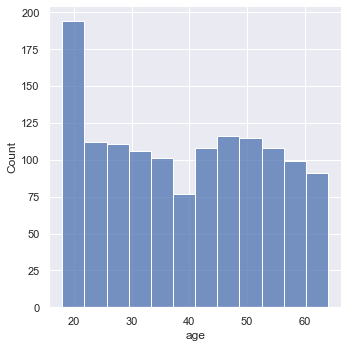

In [12]:
sns.set()
plt.figure(figsize=(8,8))
sns.displot(data['age'])
plt.show()

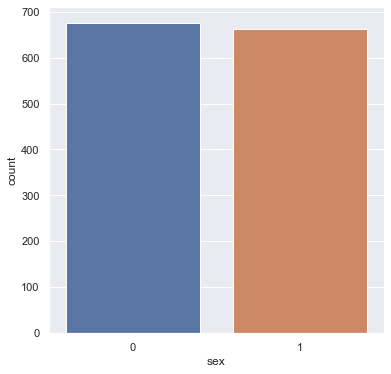

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'sex', data = data)
plt.show()

In [15]:
data['sex'].value_counts()

0    676
1    662
Name: sex, dtype: int64

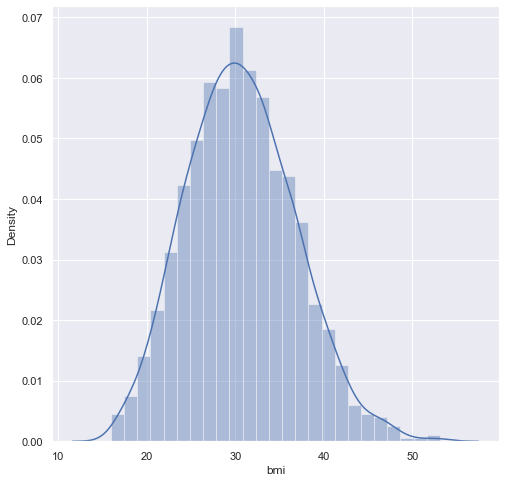

In [26]:
plt.figure(figsize=(8,8))
sns.distplot(data['bmi'])
plt.show()

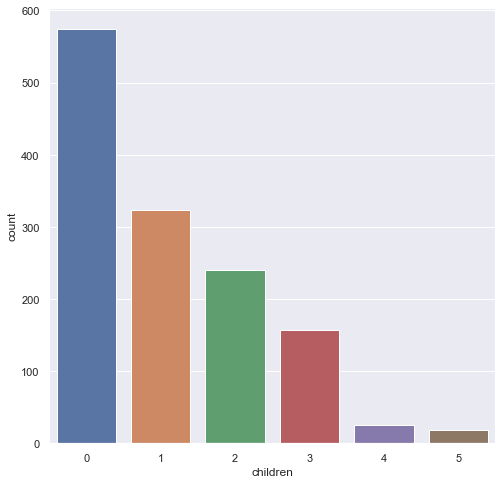

In [25]:
plt.figure(figsize=(8,8))
sns.countplot(x = 'children', data = data)
plt.show()

In [27]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

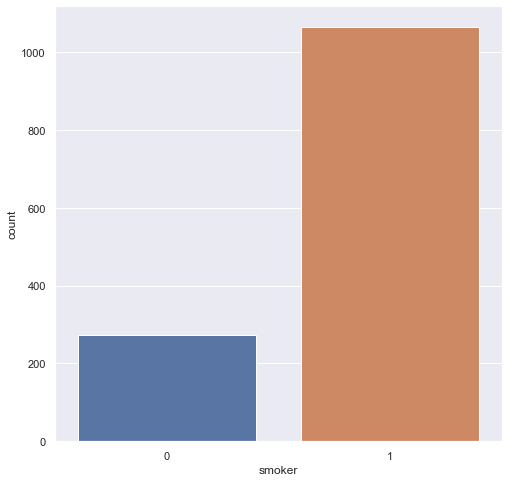

In [29]:
plt.figure(figsize=(8,8))
sns.countplot(x = 'smoker', data = data)
plt.show()
     

In [30]:
data['smoker'].value_counts()
     

1    1064
0     274
Name: smoker, dtype: int64

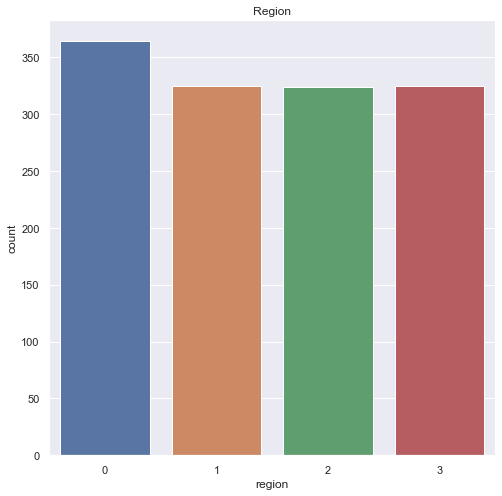

In [31]:
plt.figure(figsize=(8,8))
sns.countplot(x = 'region', data = data)
plt.title('Region')
plt.show()

In [33]:
data['region'].value_counts()

0    364
1    325
3    325
2    324
Name: region, dtype: int64

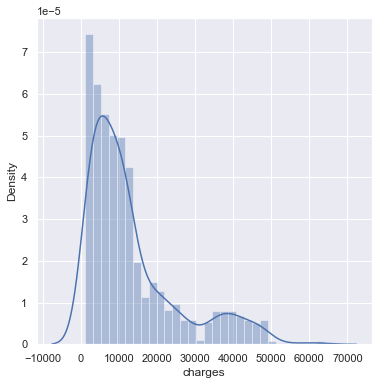

In [34]:
plt.figure(figsize=(6,6))
sns.distplot(data['charges'])
plt.show()

In [35]:
X = data.drop(columns='charges', axis = 1)
y = data['charges']

In [36]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [37]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [41]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [47]:
model = LinearRegression()

In [48]:
model.fit(X_train, y_train)

LinearRegression()

In [49]:
training_data_pred = model.predict(X_train)

In [50]:
# R squared value
r2_train = metrics.r2_score(y_train, training_data_pred)
print("R squared value:", r2_train)

R squared value: 0.751505643411174


In [51]:
test_data_pred = model.predict(X_test)

In [52]:
r2_test = metrics.r2_score(y_test, test_data_pred)
print("R squared value:", r2_test)

R squared value: 0.7447273869684077


In [53]:
input_data = (31,1,25.74,0,1,0)

# changing input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print("The insurance cost is USD",prediction[0])

The insurance cost is USD 3760.0805764960496
